In [2]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np 
from parse import parse

In [3]:
blk = "45.78	34.35	37.37 \
45.9	33.69	37.32 \
45.23	33.29	36.81 \
44.4	32.78	36.09 \
46.97	34.38	38.16 \
46.93	34.41	38.17 \
46.52	34.34	38.02 \
46.51	34.21	37.91 \
46.19	34.04	37.43 \
45.76	33.21	36.98 \
45.83	32.98	36.98 \
43.91	31.67	35.59 \
42.99	29.68	34.05 \
24.88	15.17	17.29 \
34.26	22.2	25.33 \
36.77	25.01	28.41 \
37	26.64	29.67 \
38.89	28.19	31.09 \
40.15	28.61	32.09 \
42.9	30.92	34.63 \
43.33	32.02	35.66 \
40.69	29.46	32.87 \
15.28	7.13	9.2 \
24.51	13.82	16.75 \
42.9	30.54	34.36"

louisa = "39.92	47.61	41.83 \
40.21	46.09	41.6 \
40.47	47.58	41.85 \
37.96	44.05	39.24 \
42.06	49.03	43.46 \
40.9	47.81	42.41 \
40.78	48.35	42.5 \
41.18	49.69	43.31 \
40.98	48.45	42.47 \
39.9	47.36	41.59 \
39.39	46.38	41.06 \
38.63	44.86	39.77 \
36.7	42.38	37.87 \
32.16	34.08	30.84 \
33.72	37.42	33.75 \
33.62	39.5	34.64 \
34.21	40.37	35.27 \
35.36	41.17	36.35 \
36.25	41.61	37.03 \
37.05	44.48	38.86 \
39.9	46.52	41.16 \
38.63	45.36	39.73 \
20.3	19.95	18.06 \
30.79	31.55	28.97 \
35.37	40.82	36.45"

dmvn = "36.29	40.41	31.13 \
36.05	38.48	30.51 \
36.59	39.68	31.43 \
37.04	40.38	31.26 \
34.89	40.40	30.56 \
35.09	40.70	30.54 \
37.37	42.35	31.65 \
36.84	40.76	31.56 \
35.16	39.51	30.39 \
36.99	40.22	31.38 \
33.75	35.70	28.14 \
31.67	30.41	24.24 \
26.45	25.88	19.73 \
19.52	23.33	16.04 \
23.04	24.69	18.42 \
26.64	25.28	20.57 \
30.08	25.85	21.59 \
30.23	28.83	22.88 \
31.41	31.07	24.38 \
35.46	35.70	28.37 \
35.37	38.90	30.03 \
35.48	35.30	28.23 \
33.74	34.38	26.49 \
36.12	36.05	28.71 \
35.54	39.60	30.50"

ours = "57.34	49.39	49.26 \
56.85	48.72	48.9 \
55.73	47.54	47.82 \
53.43	45.43	46.16 \
57.58	49.33	49.39 \
57.26	49.14	49.42 \
57.89	48.56	49.42 \
56.9	49.32	49.17 \
57.35	49.29	48.93 \
55.06	49.08	48.65 \
54.14	48.51	47.46 \
47.9	42.69	40.98 \
44.58	41.3	38.42 \
42.39	29.62	29.7 \
44.81	36.97	35.57 \
47.92	37.02	36.63 \
52.06	42.01	41.91 \
50.07	40.58	40.73 \
49.69	42.79	42.81 \
53.06	44.46	44.08 \
57.18	46.38	46.33 \
55.41	44	43.93 \
51.66	41.03	42.4 \
53.32	43.32	43.75 \
56.5	47.93	47.95"

def get_score( score_string ) :
    score = [float(v) for v in score_string.replace('\t',' ').split(' ')]
    score = np.array( score ).reshape([-1,3])
    return score

scores = []
for ss in [ blk, louisa, dmvn, ours ] :
    score = get_score( ss )
    scores.append( np.expand_dims( score, axis = 0 ) )
    
scores = np.concatenate( scores )

llut = { 'Bright Change(BC)' : range(1,4), 'Contrast Adjustment(CA)' : range(4,7),
        'Color Reduction(CR)' : range(7,10), 'Image Blurring(IB)' : range(10,13), 
        'JPEG Compression(JC)' : range(13,22), 'Noise Adding(NA)' : range(22,25) }

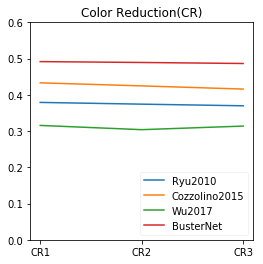

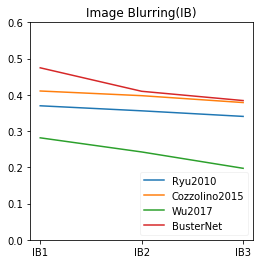

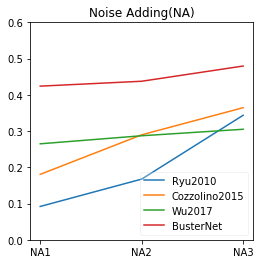

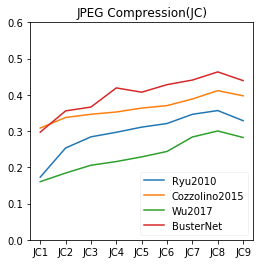

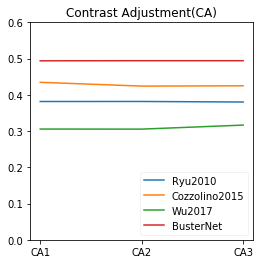

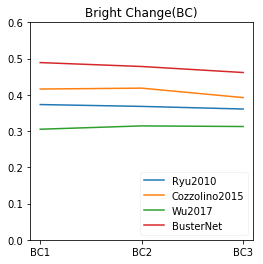

In [4]:
for key, indices in llut.iteritems() :
    stat = scores[:,indices,-1].T/100.
    pyplot.figure(figsize=(4,4))
    pyplot.plot( stat )
    pyplot.title( key )
    L = len( indices )
    _, prefix = parse( '{}({})', key)
    ticks = [ prefix + str(k) for k in range(1,L+1) ]
    pyplot.xticks( range(L), ticks )
    pyplot.legend( ['Ryu2010','Cozzolino2015','Wu2017','BusterNet'], loc = 4, framealpha = .25 )
    pyplot.ylim([0,.6])